In [1]:
import json, pycm, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [2]:
oed_cm = pycm.ConfusionMatrix(matrix=json.load(open('experiments/gpt-4_oed_woman_2023-08-29T04:17:24.523066.json', 'r'))["confusion_matrix"])
haslanger_cm = pycm.ConfusionMatrix(matrix=json.load(open('experiments/gpt-4_haslanger_woman_2023-08-28T21:07:45.882765.json', 'r'))["confusion_matrix"])
homosaurus_cm = pycm.ConfusionMatrix(matrix=json.load(open('experiments/gpt-4_homosaurus_woman_2023-08-29T06:25:02.910062.json', 'r'))["confusion_matrix"])

In [3]:
print(pycm.Compare({"OED": oed_cm, "Haslanger": haslanger_cm, "Homosaurus": homosaurus_cm}))

Best : Homosaurus

Rank   Name          Class-Score       Overall-Score
1      Homosaurus    0.91667           0.95238
2      Haslanger     0.84167           0.92381
3      OED           0.80833           0.78095



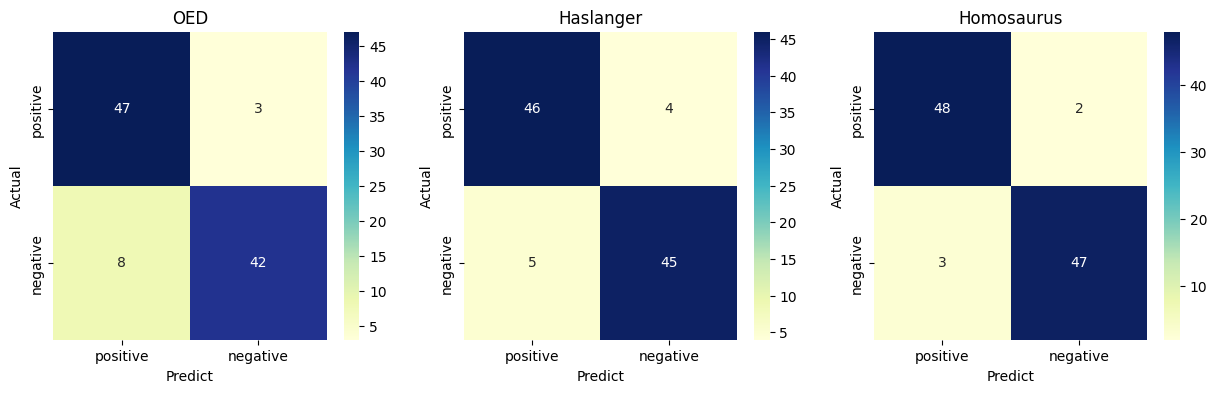

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, (name, cm) in zip(axes, [ ("OED", oed_cm), ("Haslanger", haslanger_cm), ("Homosaurus", homosaurus_cm) ]):
    df = pd.DataFrame(cm.matrix).T.fillna(0)
    sns.heatmap(df, annot=True, fmt='d', cmap="YlGnBu", ax=ax)
    ax.set_title(name)
    ax.set(xlabel='Predict', ylabel='Actual')
plt.show()

In [5]:
pd.DataFrame({"Krippendorff's Alpha": [ oed_cm.SOA9, haslanger_cm.SOA9, homosaurus_cm.SOA9 ]}, index=[ "OED", "Haslanger", "Homosaurus"])

,Krippendorff's Alpha
OED,Tentative
Haslanger,High
Homosaurus,High


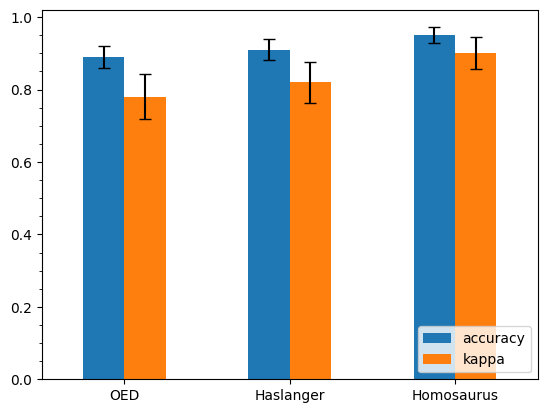

In [6]:
accuracy = [ cm.overall_stat["Overall ACC"] for cm in [ oed_cm, haslanger_cm, homosaurus_cm ] ]
accuracy_se = [ cm.CI("Overall ACC")[0] for cm in [ oed_cm, haslanger_cm, homosaurus_cm ] ]
kappa = [ cm.Kappa for cm in [ oed_cm, haslanger_cm, homosaurus_cm ] ]
kappa_se = [ cm.CI("Kappa")[0] for cm in [ oed_cm, haslanger_cm, homosaurus_cm ] ]
index = [ "OED", "Haslanger", "Homosaurus"]
df = pd.DataFrame({'accuracy': accuracy, 'kappa': kappa}, index=index)
df_se = pd.DataFrame({'accuracy': accuracy_se, 'kappa': kappa_se}, index=index)
fig, ax = plt.subplots()
ax.set_yticks(np.arange(0.05,1.0,0.05), minor=True)
df.plot.bar(yerr=df_se, ax=ax, capsize=4, rot=0).legend(loc='lower right')
plt.show()

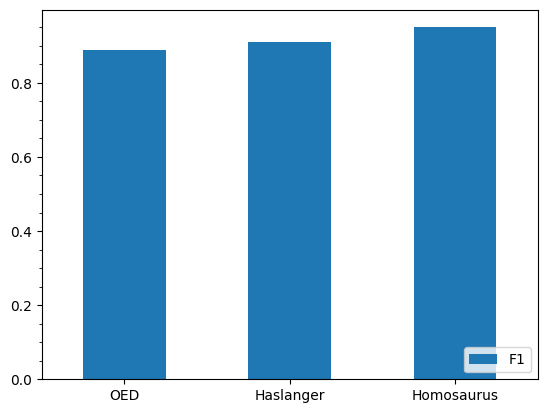

In [7]:
f1_micro = [ cm.F1_Micro for cm in [ oed_cm, haslanger_cm, homosaurus_cm ] ]
index = [ "OED", "Haslanger", "Homosaurus"]
df = pd.DataFrame({'F1': f1_micro}, index=index)
fig, ax = plt.subplots()
ax.set_yticks(np.arange(0.05,1.0,0.05), minor=True)
df.plot.bar(ax=ax, capsize=4, rot=0).legend(loc='lower right')
plt.show()